In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\Harsha\Downloads\Reviews.csv', nrows=1000)

df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [8]:
df.summary.head()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [9]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [10]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import word

df['Text']=df['Text'].apply(lambda x:"".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace('[^\w\s]','')

stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x:"".join(x for x in x.split() if x not in stop))

df['Text']=df['Text'].apply(lambda x: str(TextBlob(x),correct()))

df['Text']=df['Text'].apply(lambda x:"".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()

ModuleNotFoundError: No module named 'textblob'

In [11]:
reviews=df

reviews.dropna(inplace=True)

reviews.Score.hist(bins==5,grid=False)
plt.show()
print(reviews.groupby('Score').count().id)

NameError: name 'bins' is not defined

In [13]:
score_1=reviews[reviews['Score']==1].sample(n=47)
score_2=reviews[reviews['Score']==2].sample(n=47)
score_3=reviews[reviews['Score']==3].sample(n=47)
score_4=reviews[reviews['Score']==4].sample(n=47)
score_5=reviews[reviews['Score']==5].sample(n=47)

In [14]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

print(reviews_sample.groupby('Score').count().Id)

Score
1    47
2    47
3    47
4    47
5    47
Name: Id, dtype: int64


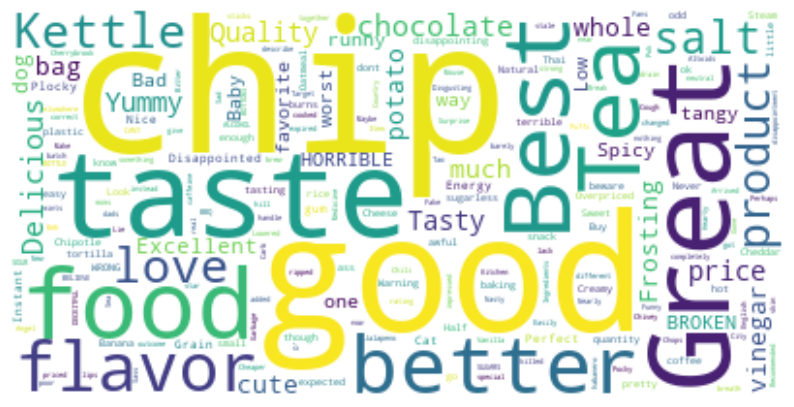

In [15]:
from wordcloud import WordCloud

reviews_str=" ".join(reviews_sample["Summary"].to_numpy())

wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()